Filter CSV file to get only the data that includes HAQ index

In [3]:
import pandas as pd
import json
df = pd.read_csv('data/haq-vs-healthcare-spending.csv')
df_data = df.dropna(subset=['HAQ Index'])
df_data.to_csv('data/HAQ_index_filtered.csv', index=False)


In [4]:
json_data = df_data.to_json(orient='records')
with open('data/haq_data.json', 'w') as json_file:
    json_file.write(json_data)


In [5]:
df_haq = pd.read_json('data/haq_data.json')
df_haq


,Entity,Code,Year,HAQ Index,"Current health expenditure per capita, PPP (current international $)",Population (historical estimates),Continent
0,Afghanistan,AFG,1990,24.7,NaN,10694804.0,None
1,Afghanistan,AFG,1995,24.5,NaN,16418911.0,None
2,Afghanistan,AFG,2000,24.8,NaN,19542986.0,None
3,Afghanistan,AFG,2005,27.1,100.706985,24411196.0,None
4,Afghanistan,AFG,2010,29.4,143.669500,28189672.0,None
...,...,...,...,...,...,...,...
1327,Zimbabwe,ZWE,1995,49.5,NaN,10994044.0,None
1328,Zimbabwe,ZWE,2000,45.4,NaN,11834679.0,None
1329,Zimbabwe,ZWE,2005,41.8,NaN,12224758.0,None
1330,Zimbabwe,ZWE,2010,42.1,191.800080,12839774.0,None


Prototype

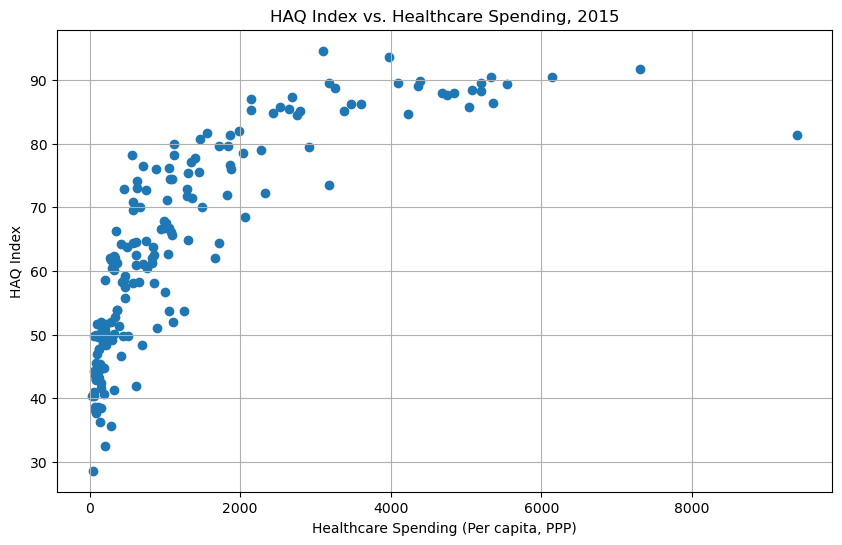

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('data/haq_data.json')
df = df[df['Year'] == 2015]
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Current health expenditure per capita, PPP (current international $)'], df['HAQ Index'])
plt.title('HAQ Index vs. Healthcare Spending, 2015')
plt.xlabel('Healthcare Spending (Per capita, PPP)')
plt.ylabel('HAQ Index')
plt.grid(True)
plt.show()


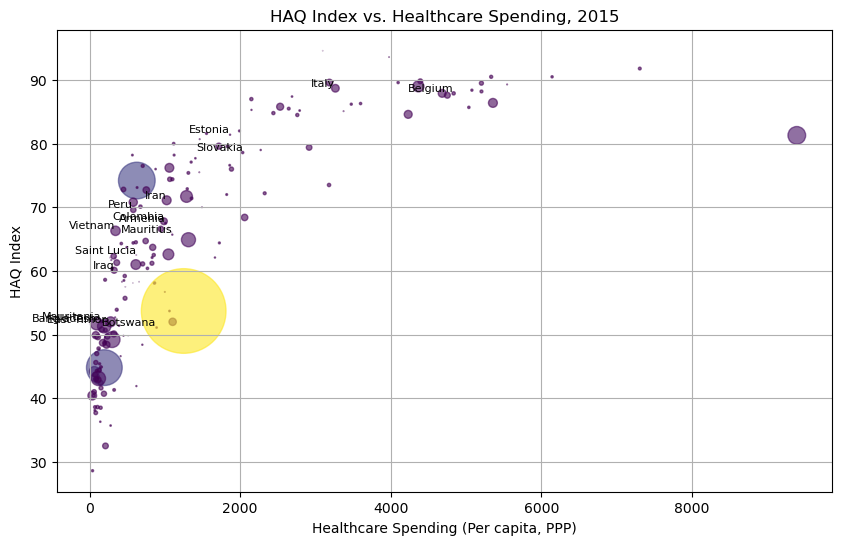

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

df = pd.read_json('data/haq_data.json')

df = df[df['Year'] == 2015]
scaling = 0.0000005
plt.figure(figsize=(10, 6))
top_20 = df.sample(n=20, random_state=42)

plt.scatter(
    df['Current health expenditure per capita, PPP (current international $)'],
    df['HAQ Index'],
    s=df['Population (historical estimates)'] * scaling,
    alpha=0.6,  # Set transparency for better visualization
    cmap='viridis',  # Use a color map for varying colors
    c=df['Population (historical estimates)'],
)
for i, txt in enumerate(top_20['Entity']):
    plt.annotate(txt, (top_20['Current health expenditure per capita, PPP (current international $)'].iloc[i],
                       top_20['HAQ Index'].iloc[i]), fontsize=8, ha='right', va='bottom')
plt.title('HAQ Index vs. Healthcare Spending, 2015')
plt.xlabel('Healthcare Spending (Per capita, PPP)')
plt.ylabel('HAQ Index')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'HAQ Index over Time')

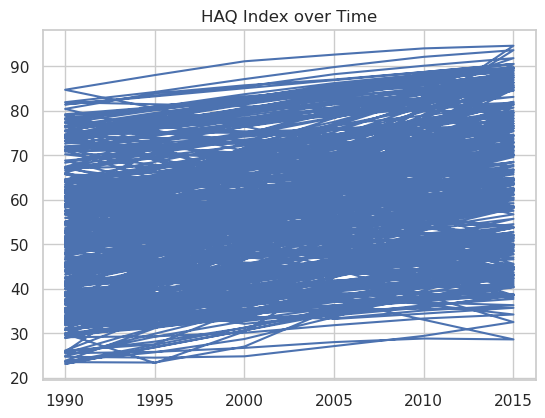

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df['Year'], df['HAQ Index'])
plt.title('HAQ Index over Time')
